In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Deep Reinforcement Learning with Gomoku 

### Gomoku as an RL problem

---
### Judging a field's value by its neighborhood

In [54]:
from GomokuTools import GomokuTools, N_9x9

We make the (admittedly naive and limiting) assumptions that  
1. what matters for the primary estimation of a position's value is determined by the 9x9 neighborhood of that field, and
2. fields that don't share a common line (x, y, or diagonal) with the given position, don't matter either.

Farther fields simply won't directly contribute to a common line of length 5 or smaller.

Class ```N_9x9``` in [GomokuTools.py](GomokuTools.py) describes the world from the point of view of a particular position. This view can be regarded as the relevant environment represented in some kind of polar-coordinates. It is much more meaningful to a neural network (I hope) than the cartesian representation. It allows us to devise a 64-bit representation of the current *threat* or *opportunity* created for a position by the adjacent stones.

```register(color, direction, distance) ``` tells the class that there is a stone of color $c$ in direction $d$ with distance $s$

Observe the different representations of the 9x9 neighborhood: First the hex string representation, then the 64 bits, which we'll eventually feed into our valuation network, and finally the human-readable form we'll use for contemplation throughout this tutorial.

In [55]:
f = N_9x9().register('b', 'nw', 1).register('w', 'nw', 2).register('w', 's', 4)
print(f)
print(f.as_hex())
f.as_bits()

|                 |
|                 |
|    o            |
|      x          |
|        *        |
|                 |
|                 |
|                 |
|        o        |
0000000000800804


[[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0]]]

---
### Heuristic Score
The heuristic score class is trying to provide a good measure of reward for offensive and defensive moves. See [Heuristics.ipynb](Heuristics.ipynb) for a deeper look into the reasoning behind this particular implementation.

In [56]:
from HeuristicScore import HeuristicScore
h = HeuristicScore()
n = (N_9x9()
     .register('b', 'e', 1)
     .register('b', 'e', 2)
     .register('b', 'nw', 2)
     .register('b', 'nw', 3))
n

|                 |
|  x              |
|    x            |
|                 |
|        * x x    |
|                 |
|                 |
|                 |
|                 |

A score of $3$ and above means: Serious trouble ahead. That's what we'd expect from the above picture.

In [57]:
h.total_score(n.as_bits())

3.5635948725613575

---
## The Gomoku Board

In [58]:
A,B,C,D,E,F,G,H,I,K,L,M,N,O,P = 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15

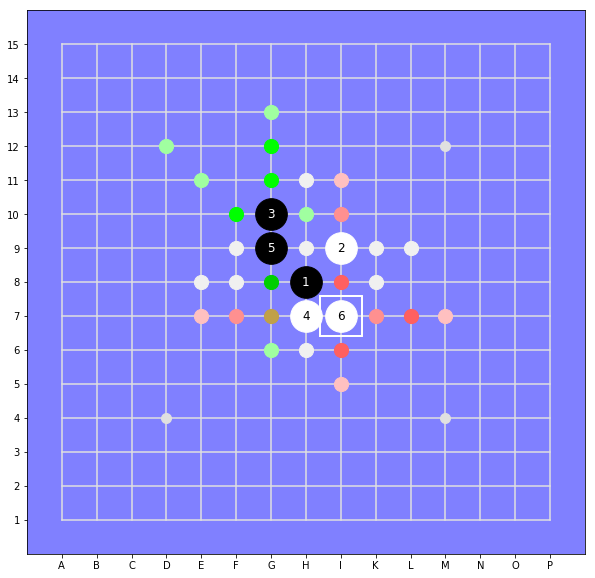

In [59]:
board = GomokuBoard(15, 10, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.display(score='current');

---
## Let's play